<a href="https://colab.research.google.com/github/DimpleB0501/artifical_intelligence_projects/blob/main/2_deep_learning/pose_estimation_assignment/pose_estimation_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
Task  1.1 The task  is to get all the landmarks on the body from the image and save the image as result [image format/ .jpg/.png/.jpeg format]. 
Expected Output image should be similar to the below image depending on the Human Pose estimation model used:

###Task 1.2
Elaborate on Technology  used. For example, the packages downloaded and used. (Max 150 words)

Model used: Keypoint RCNN deep learning model with a ResNet-50 base architecture <br/>
Pytorch implemetation: https://pytorch.org/vision/stable/generated/torchvision.models.detection.keypointrcnn_resnet50_fpn.html

This model has been pre-trained on the COCO Keypoint dataset. <br/>
 It outputs the keypoints for 17 human parts and body joints. They are: ‘nose’, ‘left_eye’, ‘right_eye’, ‘left_ear’, ‘right_ear’, ‘left_shoulder’, ‘right_shoulder’, ‘left_elbow’, ‘right_elbow’, ‘left_wrist’, ‘right_wrist’, ‘left_hip’, ‘right_hip’, ‘left_knee’, ‘right_knee’, ‘left_ankle’, ‘right_ankle’.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cd "/content/drive/My Drive/images"

Mounted at /content/drive


Text(0.5, 1.0, 'Output Task1')

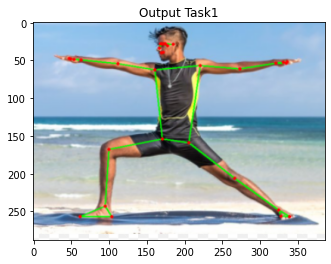

In [3]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
img = cv2.imread('/content/drive/My Drive/images/task1_op.png')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.title('Output Task1')


# Assignment 1 start


In [4]:
import cv2
import matplotlib

In [5]:
# pairs of edges for 17 of the keypoints detected ...
# ... these show which points to be connected to which point ...
# ... we can omit any of the connecting points if we want, basically ...
# ... we can easily connect less than or equal to 17 pairs of points ...
# ... for keypoint RCNN, not  mandatory to join all 17 keypoint pairs
edges = [
    (0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10),
    (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
    (12, 14), (14, 16), (5, 6)
]

In [6]:
def draw_keypoints(outputs, image):
    # the `outputs` is list which in-turn contains the dictionaries 
    for i in range(len(outputs[0]['keypoints'])):
        keypoints = outputs[0]['keypoints'][i].cpu().detach().numpy()
        # proceed to draw the lines if the confidence score is above 0.9
        if outputs[0]['scores'][i] > 0.9:
            keypoints = keypoints[:, :].reshape(-1, 3)
            for p in range(keypoints.shape[0]):
                # draw the keypoints
                cv2.circle(image, (int(keypoints[p, 0]), int(keypoints[p, 1])), 
                            3, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
                # uncomment the following lines if you want to put keypoint number
                # cv2.putText(image, f"{p}", (int(keypoints[p, 0]+10), int(keypoints[p, 1]-5)),
                #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            for ie, e in enumerate(edges):
                # get different colors for the edges
                rgb = matplotlib.colors.hsv_to_rgb([
                    ie/float(len(edges)), 1.0, 1.0
                ])
                rgb = rgb*255
                # join the keypoint pairs to draw the skeletal structure
                cv2.line(image, (keypoints[e, 0][0], keypoints[e, 1][0]),
                        (keypoints[e, 0][1], keypoints[e, 1][1]),
                        tuple(rgb), 2, lineType=cv2.LINE_AA)
        else:
            continue
    return image

In [7]:
import torch
import torchvision
import numpy as np
import cv2
import argparse
from PIL import Image
from torchvision.transforms import transforms as transforms

In [8]:
# transform to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [9]:
# initialize the model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True,
                                                               num_keypoints=17)
# set the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# load the modle on to the computation device and set to eval mode
model.to(device).eval()

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


  0%|          | 0.00/226M [00:00<?, ?B/s]

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [10]:
# read and prepare the image
image = Image.open('/content/drive/My Drive/images/task1_in.png').convert('RGB')
# NumPy copy of the image for OpenCV functions
orig_numpy = np.array(image, dtype=np.float32)
# convert the NumPy image to OpenCV BGR format
orig_numpy = cv2.cvtColor(orig_numpy, cv2.COLOR_RGB2BGR) / 255.
# transform the image
image = transform(image)
# add a batch dimension
image = image.unsqueeze(0).to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'task1 output')

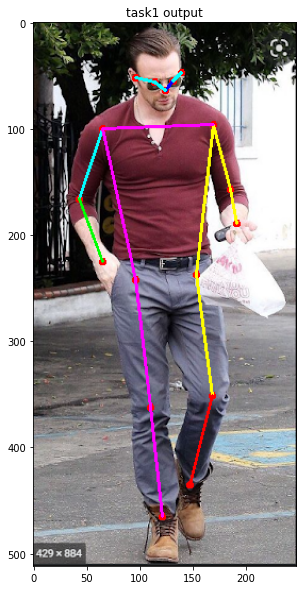

In [11]:
%matplotlib inline
with torch.no_grad():
    outputs = model(image)
output_image = draw_keypoints(outputs, orig_numpy)
# visualize the image
output_image=cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(output_image)
plt.title("task1 output")


# Task 2
TASK 2 : For this task, the input is live feed from a webcam.In this section, you should get only  **the specified** landmarks on the body.

The landmarks are:
- Nose
- Left shoulder 
- Right shoulder
- Right elbow
- Left elbow
- Right knee
- Left knee 
- Right ankle
- Left ankle


Text(0.5, 1.0, 'Output Task2')

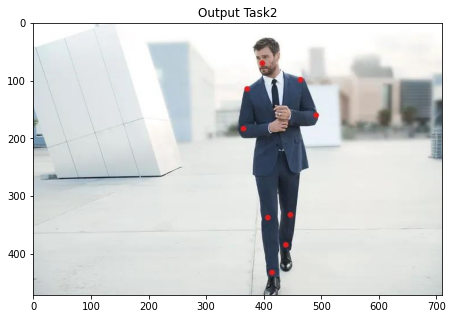

In [12]:
%matplotlib inline
img = cv2.imread('/content/drive/My Drive/images/task2_output.jpg')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(img_cvt)
plt.title('Output Task2')

# Task 2 

1.   I wasn't able to use colab to record live feed from webcam. I used my laptop to run this code. I have attached the codes from my computer as a zip file. <br/>
Following is the output youtube video from my webcam<br/>
https://youtu.be/IKSU_8M1veY

2.   Below is the modification I made to get the desired landmarks on an image



In [13]:
import matplotlib

In [14]:
def draw_desired_keypoints(outputs, image):
    index = [0, 5, 6, 7, 8, 13, 14, 15, 16]
    # the `outputs` is list which in-turn contains the dictionaries
    for i in range(len(outputs[0]['keypoints'])):
        keypoints = outputs[0]['keypoints'][i].cpu().detach().numpy()
        # proceed to draw the lines if the confidence score is above 0.9
        if outputs[0]['scores'][i] > 0.9:
            keypoints = keypoints[:, :].reshape(-1, 3)
            for p in range(keypoints.shape[0]):
                if p in index:
                    # draw the keypoints
                    cv2.circle(image, (int(keypoints[p, 0]), int(keypoints[p, 1])),
                                3, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        else:
            continue
    return image

In [15]:
# read and prepare the image
image = Image.open('/content/drive/My Drive/images/task1_in.png').convert('RGB')
# NumPy copy of the image for OpenCV functions
orig_numpy = np.array(image, dtype=np.float32)
# convert the NumPy image to OpenCV BGR format
orig_numpy = cv2.cvtColor(orig_numpy, cv2.COLOR_RGB2BGR) / 255.
# transform the image
image = transform(image)
# add a batch dimension
image = image.unsqueeze(0).to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'task1 output')

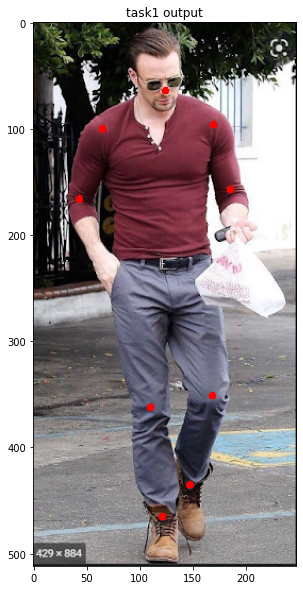

In [16]:
%matplotlib inline
with torch.no_grad():
    outputs = model(image)
output_image = draw_desired_keypoints(outputs, orig_numpy)
# visualize the image
output_image=cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(output_image)
plt.title("task1 output")

# Task 3
- Illustrate the process of creating a pose classification model with steps starting from ML package choice (tensorflow/pytorch) to testing the model.
- What method can be used as a feedback control loop in pose classification if a human pose estimation model is used to get the landmarks ? In simple words, can landmarks of body parts be used to validate the result from the pose classifier?


# Working with webcam colab - incomplete couldn't make much progress (rework)

In [17]:
import IPython


In [18]:
# Camera Capture
# Using a webcam to capture images for processing on the runtime.
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


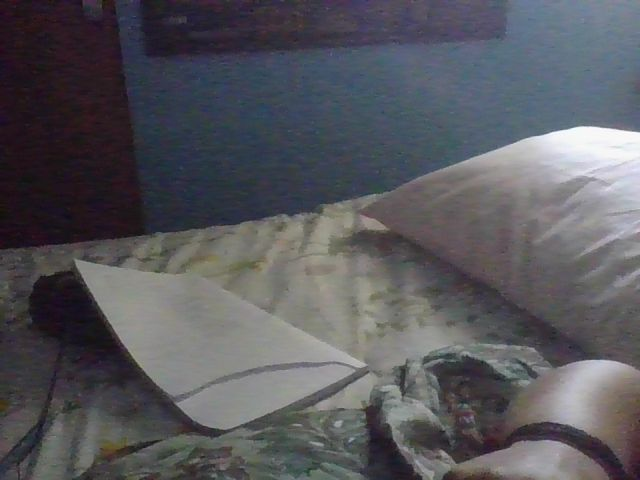

In [19]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))